In [1]:
from datetime import datetime,date,time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

from statsmodels.tsa.stattools import adfuller#判断时序数据稳定性的第二种方法
from pandas import Series


from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("四川台区日负荷.csv")
df.序列 = df.序列.apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [3]:
#TIMESTEPS = 672
df_series=df.set_index("序列").sort_index().值
df_series=df_series["2017-8-3":"2017-11-20"]# 11-24,25 and 12-11,12 do not have correct numbers. so dropped
df_diff=df_series.diff(96).dropna()

In [4]:
#df_train=df_series[:'2017-11-1'];df_test=df_series['2017-11-2':]

In [5]:
#df_diff

In [6]:
pd.concat((df_series,df_series.shift(1)),axis=1,keys=["v1","v2"]).corr()

,v1,v2
v1,1.000000,0.959223
v2,0.959223,1.000000


||v1|v2|
|------|------|------|
|v1|1.000000|0.959223|
|v2|0.959223|1.000000|

In [7]:
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import Day

In [8]:
start_date=datetime(2017,9,1)
s_date=start_date.date().strftime("%Y-%m-%d")
e_date=(start_date+Day(6)).date().strftime("%Y-%m-%d")
t_date=(start_date+Day(7)).date().strftime("%Y-%m-%d")
t_date

'2017-09-08'

In [9]:
df_train=df_diff[s_date:e_date];df_test=df_series[t_date]

In [10]:
#df_series.join(df_series.shift(1),rsuffix="r1").dropna().corr()

In [11]:
a=ARIMA(df_train,[3,1,2])

/home/techstar/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)
/home/techstar/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  % freq, ValueWarning)


In [12]:
result = a.fit(disp=0)

In [13]:
re=result.forecast(steps=96)[0]
#re

In [14]:
re_pred= df_series[e_date]+re
re_pred= re_pred.shift(freq='D')
#re_pred

In [15]:
#re=pd.concat((pd.Series(re,index=df_test.index),df_test),axis=1,keys=["vp","vo"])
rev=pd.concat((re_pred,df_test),axis=1,keys=["vp","vo"])
rev

,vp,vo
序列,,
2017-09-08 00:00:00,3.522090,2.5603
2017-09-08 00:15:00,2.841424,2.7013
2017-09-08 00:30:00,2.149658,2.8793
2017-09-08 00:45:00,1.863886,2.9355
2017-09-08 01:00:00,1.776050,2.9979
2017-09-08 01:15:00,1.387405,2.7815
2017-09-08 01:30:00,1.623707,2.6480
2017-09-08 01:45:00,1.154685,2.2244
2017-09-08 02:00:00,1.133674,2.1008


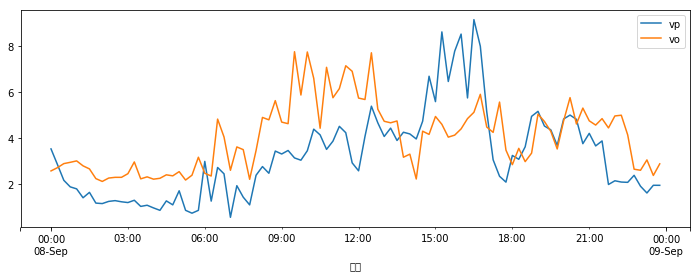

In [16]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)
rev.plot()
plt.show()

True

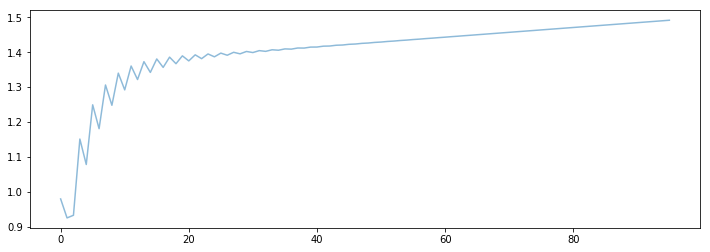

In [68]:
plt.plot(re,alpha =0.5)
re1 =result.predict(datetime(2017,8,11,0,0,0),datetime(2017,8,11,23,45,0),typ="levels")
#re1.plot(alpha =0.5)
(re1.values==re).all()

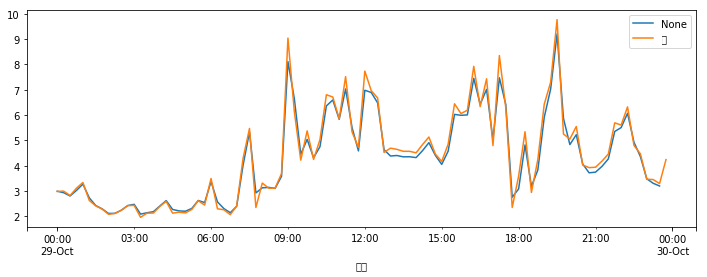

In [17]:
result.predict(typ="levels")["2017-10-29"].shift(-1).plot()
df_train["2017-10-29"].plot()
plt.legend(loc="best")

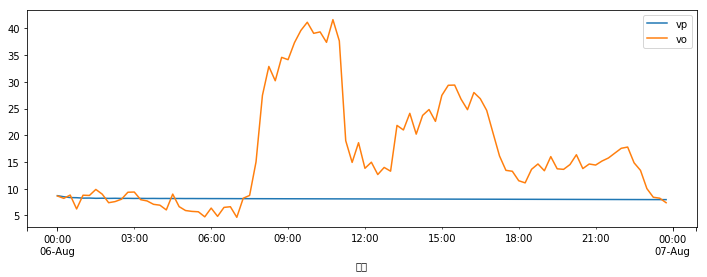

In [26]:
re.plot()
plt.legend(loc="best")
plt.show()

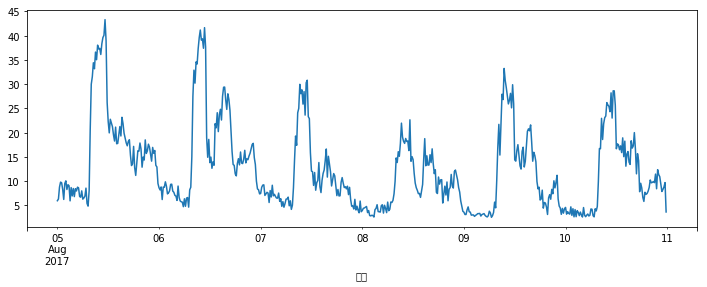

In [16]:
df_train["2017-08-05":"2017-08-10"].plot()

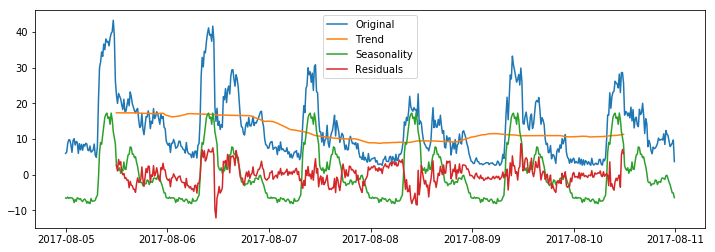

In [47]:
#Decomposing-分解
#分解(decomposing) 可以用来把时序数据中的趋势和周期性数据都分离出来:
# 返回包含三个部分 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
from statsmodels.tsa.seasonal import seasonal_decompose#分解(decomposing) 可以用来把时序数据中的趋势和周期性数据都分离出来

df_decom=df_series["2017-08-05":"2017-08-10"]
decomposition = seasonal_decompose(df_decom,freq=96)

trend = decomposition.trend#trend（趋势部分）
seasonal = decomposition.seasonal#seasonal（季节性部分）
residual = decomposition.resid#residual (残留部分)

#plt.subplot(411)
plt.plot(df_decom, label='Original')
plt.legend(loc='best')
#plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
#plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
#plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#plt.tight_layout()

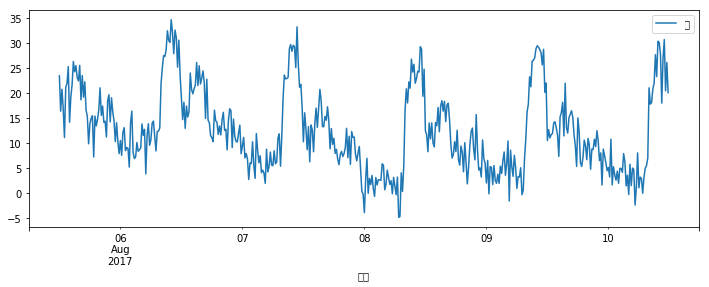

In [58]:
(pd.DataFrame(np.random.normal(scale=2.8,size=len(trend)),index=trend.index,columns=["值"])+trend+seasonal).plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9c3e40b70>]],
      dtype=object)

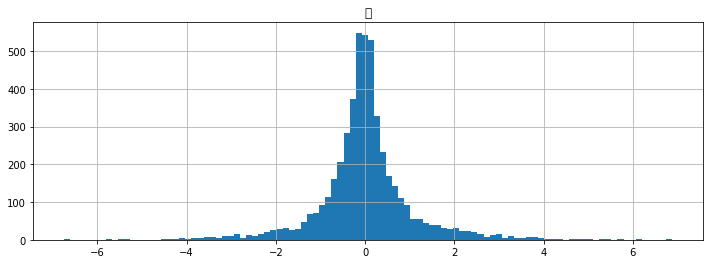

In [104]:
df_series.diff()["2017-10-1":"2017-11-20"].hist(bins=100)

/home/techstar/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 864x288 with 0 Axes>

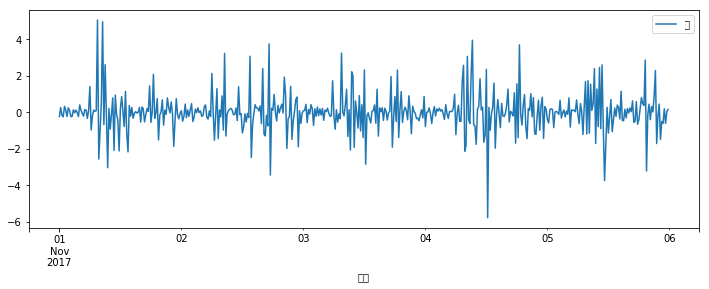

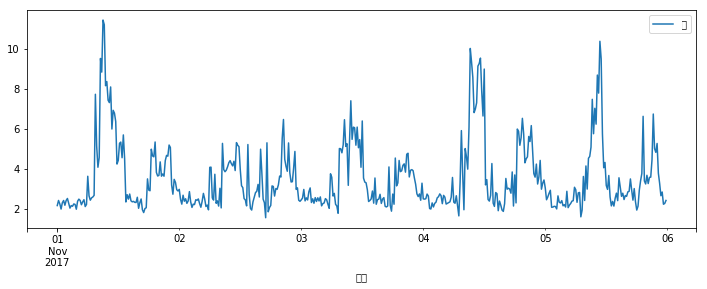

In [164]:
#fig=plt.figure()
df_series.diff()["2017-11-1":"2017-11-5"].plot(figsize=(12,4))
df_series["2017-11-1":"2017-11-5"].plot(figsize=(12,4))
#fig.show()                                                

In [77]:
adfuller(df_series.值, autolag='AIC')

(-11.48690443643451,
 4.840812464605349e-21,
 39,
 14360,
 {'1%': -3.430805464437793,
  '5%': -2.8617412949192875,
  '10%': -2.5668771445412824},
 54723.47612182477)

In [191]:
(df_series.resample("D").count())[(df_series.resample("D").count()!=96).values]

,值
序列,
2017-08-02,95
2017-11-24,1
2017-11-25,95
2017-12-11,1
2017-12-12,95
2018-01-01,1


In [8]:
from statsmodels.tsa.stattools import acf, pacf #自相关   偏相关

In [18]:
lag_acf = acf(df_series.dropna(), nlags=100)#nlags表示要计算ACF的滞后数
lag_pacf = pacf(df_series.dropna(), nlags=100, method='ols')#ols  最小二乘法

In [13]:
lag_acf = acf(df_series.resample("H").mean(), nlags=40)#nlags表示要计算ACF的滞后数
lag_pacf = pacf(df_series.resample("H").mean(), nlags=40, method='ols')#ols  最小二乘法

In [19]:
lag_acf

array([1.        , 0.95921075, 0.93094909, 0.89939966, 0.86567851,
       0.83146854, 0.79596123, 0.76028573, 0.7243811 , 0.68954206,
       0.65454666, 0.62308055, 0.59376637, 0.56802568, 0.54638114,
       0.52901555, 0.51582608, 0.50957822, 0.50348929, 0.49929849,
       0.49476607, 0.4900926 , 0.4858471 , 0.47652153, 0.46558456,
       0.45271302, 0.43939898, 0.42349964, 0.40614134, 0.38728284,
       0.36890954, 0.35207285, 0.33744793, 0.32473955, 0.31496215,
       0.30682428, 0.3015955 , 0.29938591, 0.30013726, 0.30515515,
       0.31311706, 0.32209951, 0.33063776, 0.33940991, 0.34720157,
       0.35253417, 0.35535946, 0.35720538, 0.35638061, 0.35461627,
       0.35094459, 0.34524181, 0.33733649, 0.32832756, 0.3172066 ,
       0.30626942, 0.29679812, 0.28712982, 0.279663  , 0.27515618,
       0.2750772 , 0.27684516, 0.28226442, 0.29034785, 0.30117429,
       0.31431548, 0.32870628, 0.34411575, 0.35999831, 0.37539632,
       0.38841274, 0.40100413, 0.4123904 , 0.42218223, 0.42889

In [20]:
lag_pacf

array([ 1.00000000e+00,  9.59220449e-01,  1.35958307e-01, -3.27959098e-02,
       -5.29171143e-02, -3.33709426e-02, -3.66166209e-02, -2.54334299e-02,
       -2.27995692e-02, -6.83479767e-03, -1.75288759e-02,  2.42252078e-02,
        2.08609183e-02,  3.47414707e-02,  4.53437873e-02,  5.14324030e-02,
        5.12084853e-02,  8.80905696e-02,  1.49161060e-02,  1.06201470e-02,
       -1.37376566e-02, -1.42225665e-02, -4.64536379e-03, -6.78831853e-02,
       -4.45241964e-02, -3.07359809e-02, -6.00405336e-03, -2.09655433e-02,
       -1.50415968e-02, -1.04914815e-02,  1.52846688e-02,  3.47922005e-02,
        4.81093101e-02,  4.06699012e-02,  4.31633459e-02,  2.20402255e-02,
        2.64357121e-02,  2.90912726e-02,  2.63453928e-02,  3.78383266e-02,
        3.65512164e-02,  1.16077156e-02, -8.74883402e-03, -5.65539460e-03,
       -8.66375189e-03, -2.23337263e-02, -2.11165028e-02,  5.62462096e-03,
       -7.08858893e-03,  1.05418145e-02,  7.71255717e-03,  3.06220863e-03,
       -4.60050034e-03,  

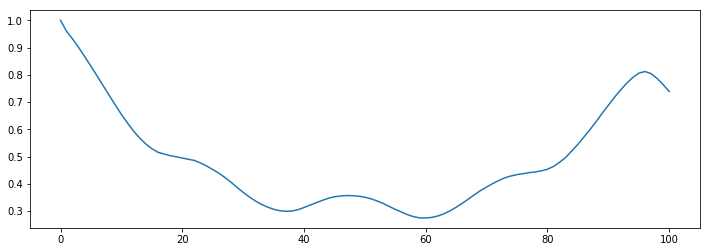

In [21]:
plt.plot(lag_acf)

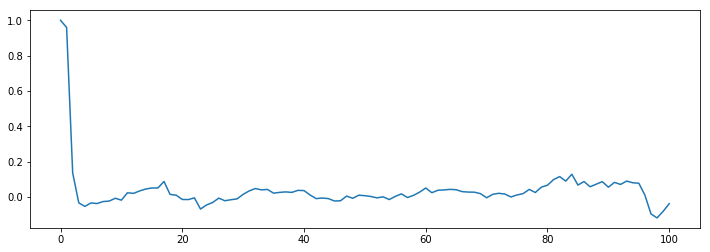

In [22]:
plt.plot(lag_pacf)

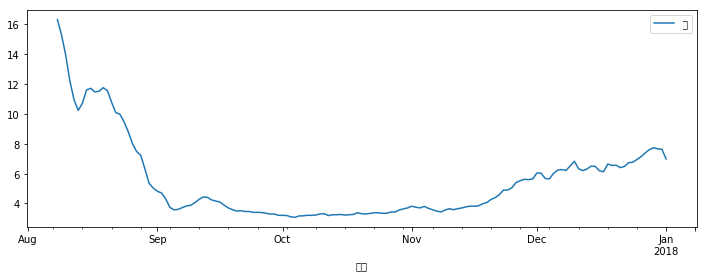

In [43]:
df_series.resample("D").mean().rolling(window=7).mean().plot()

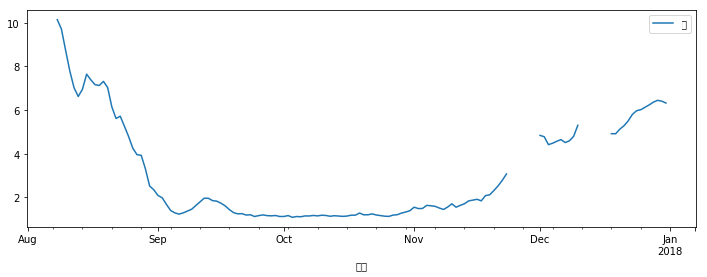

In [47]:
df_series.resample("D").std().rolling(window=7).mean().plot()

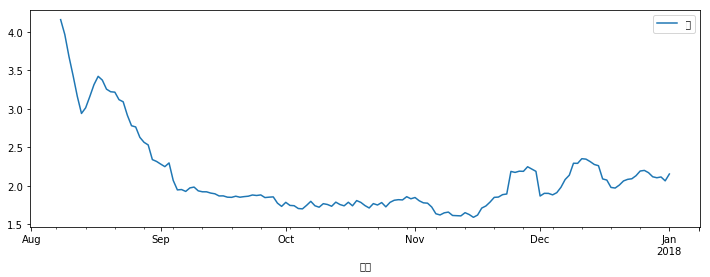

In [45]:
df_series.resample("D").min().rolling(window=7).mean().plot()

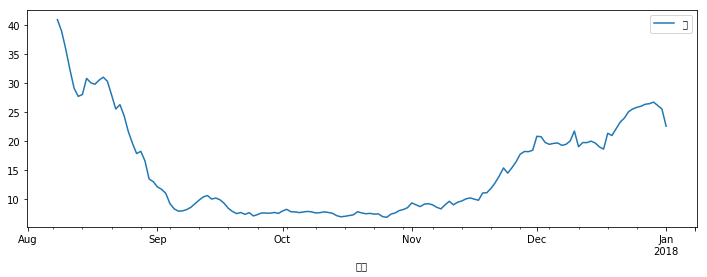

In [46]:
df_series.resample("D").max().rolling(window=7).mean().plot()

In [153]:
df["date"]=df.序列.apply(lambda x: x.date())

In [154]:
df["time"]=df.序列.apply(lambda x: x.time())

In [155]:
df_reshaped=df.pivot("date","time","值")
df_reshaped = df_reshaped.dropna()

In [156]:
tr=df_reshaped[df_reshaped.index<date(2017,12,15)]
te=df_reshaped[df_reshaped.index>=date(2017,12,15)]

In [157]:
M= tr.mean()
Std = tr.std()

In [158]:
train = (tr-M)/Std; test = (te-M)/Std

In [159]:
TIMESTEPS = 7
STEP =1

serieses=[]
nextday=[]

for i in range(0,len(train)-TIMESTEPS,STEP):
    serieses.append(np.array(train.iloc[i: i + TIMESTEPS]))
    nextday.append(np.array(train.iloc[i + TIMESTEPS]))    

In [117]:
model = Sequential()
model.add(LSTM(50, input_shape=(TIMESTEPS, len(train.columns)),init="normal"))
model.add(Dense(len(train.columns),init="normal"))


/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(7, 96), kernel_initializer="normal")`
  
/home/techstar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
model.compile(loss='mae', optimizer='adam')

In [100]:
#model.compile(loss='mean_squared_error', 
#              optimizer=keras.optimizers.SGD(lr=0.1))

In [119]:
model.fit(np.array(serieses), np.array(nextday), epochs=30,batch_size=10,
          shuffle=False,verbose=2,validation_split=0.2) 

Train on 98 samples, validate on 25 samples
Epoch 1/30
 - 1s - loss: 0.6082 - val_loss: 0.5050
Epoch 2/30
 - 0s - loss: 0.4866 - val_loss: 0.4953
Epoch 3/30
 - 0s - loss: 0.4115 - val_loss: 0.4978
Epoch 4/30
 - 0s - loss: 0.3798 - val_loss: 0.4937
Epoch 5/30
 - 0s - loss: 0.3629 - val_loss: 0.4958
Epoch 6/30
 - 0s - loss: 0.3491 - val_loss: 0.4979
Epoch 7/30
 - 0s - loss: 0.3407 - val_loss: 0.4987
Epoch 8/30
 - 0s - loss: 0.3347 - val_loss: 0.4977
Epoch 9/30
 - 0s - loss: 0.3302 - val_loss: 0.4952
Epoch 10/30
 - 0s - loss: 0.3262 - val_loss: 0.4930
Epoch 11/30
 - 0s - loss: 0.3230 - val_loss: 0.4912
Epoch 12/30
 - 0s - loss: 0.3198 - val_loss: 0.4903
Epoch 13/30
 - 0s - loss: 0.3176 - val_loss: 0.4903
Epoch 14/30
 - 0s - loss: 0.3166 - val_loss: 0.4881
Epoch 15/30
 - 0s - loss: 0.3147 - val_loss: 0.4899
Epoch 16/30
 - 0s - loss: 0.3128 - val_loss: 0.4869
Epoch 17/30
 - 0s - loss: 0.3101 - val_loss: 0.4888
Epoch 18/30
 - 0s - loss: 0.3078 - val_loss: 0.4865
Epoch 19/30
 - 0s - loss: 0.3

In [12]:
np.array(serieses).shape



(123, 7, 96)

In [10]:
M

time
00:00:00    3.552465
00:15:00    3.381959
00:30:00    3.330009
00:45:00    3.327397
01:00:00    3.259541
01:15:00    3.213192
01:30:00    3.134435
01:45:00    3.187204
02:00:00    2.972076
02:15:00    3.008083
02:30:00    3.002568
02:45:00    2.973635
03:00:00    2.951577
03:15:00    3.014548
03:30:00    2.969480
03:45:00    2.979365
04:00:00    2.888717
04:15:00    2.912635
04:30:00    2.875965
04:45:00    2.866123
05:00:00    2.916825
05:15:00    2.881388
05:30:00    2.945003
05:45:00    2.965497
06:00:00    3.302913
06:15:00    3.288755
06:30:00    3.545865
06:45:00    3.765354
07:00:00    3.450325
07:15:00    3.506449
              ...   
16:30:00    6.219605
16:45:00    5.911985
17:00:00    5.717959
17:15:00    5.279047
17:30:00    4.772043
17:45:00    4.584837
18:00:00    4.617358
18:15:00    4.293140
18:30:00    4.660105
18:45:00    4.860065
19:00:00    5.124025
19:15:00    5.465647
19:30:00    5.754281
19:45:00    5.551189
20:00:00    5.850447
20:15:00    6.065710
20:30:00

In [160]:
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

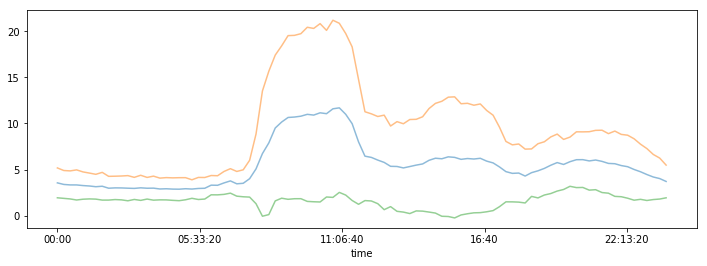

In [161]:
M.plot(alpha =0.5,figsize = (12,4))
(M+Std).plot(alpha =0.5,figsize = (12,4))
(M-Std).plot(alpha =0.5,figsize = (12,4))

In [39]:
df_reshaped.index[-140:]

Index([2017-08-10, 2017-08-11, 2017-08-12, 2017-08-13, 2017-08-14, 2017-08-15,
       2017-08-16, 2017-08-17, 2017-08-18, 2017-08-19,
       ...
       2017-12-22, 2017-12-23, 2017-12-24, 2017-12-25, 2017-12-26, 2017-12-27,
       2017-12-28, 2017-12-29, 2017-12-30, 2017-12-31],
      dtype='object', name='date', length=140)

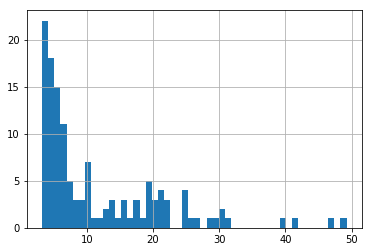

In [13]:
tr[time(10,45,0)].hist(bins=50)

In [12]:
TIMESTEPS = 7
STEP =1

serieses=[]
nextday=[]

for i in range(0,len(df_reshaped)-TIMESTEPS,STEP):
    serieses.append(np.array(df_reshaped.iloc[i: i + TIMESTEPS]))
    nextday.append(np.array(df_reshaped.iloc[i + TIMESTEPS]))    

In [8]:
S = np.array(serieses)

In [9]:
S.shape

(140, 7, 96)

In [21]:
S_mean=S.mean(axis=1);S_std=S.std(axis=1)

In [41]:
df_mean= pd.DataFrame(S_mean, columns = tr.columns, index=df_reshaped.index[-140:])
df_std= pd.DataFrame(S_std, columns = tr.columns,index=df_reshaped.index[-140:])

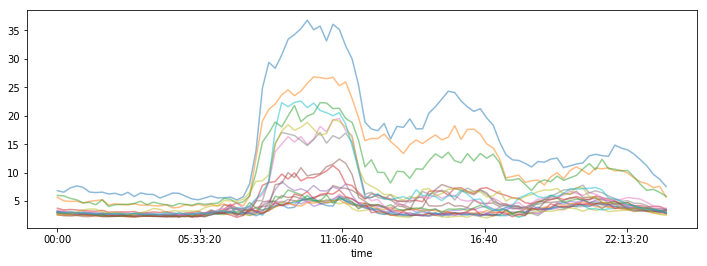

In [48]:
for i in range(0,len(df_mean),7):
    df_mean.iloc[i].plot(alpha =0.5,figsize = (12,4))
#    (df_mean.iloc[i]+df_std.iloc[i]).plot(alpha =0.5,figsize = (12,4))
#    (df_mean.iloc[i]-df_std.iloc[i]).plot(alpha =0.5,figsize = (12,4))

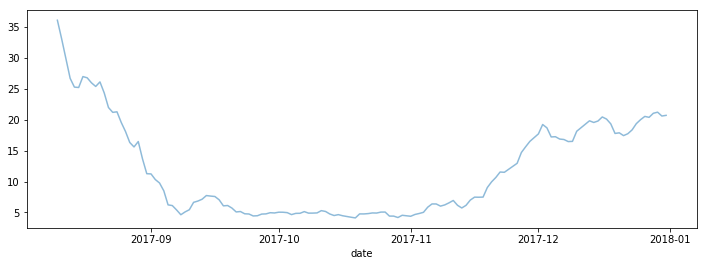

In [42]:
df_mean[time(10,45,0)].plot(alpha =0.5,figsize = (12,4))

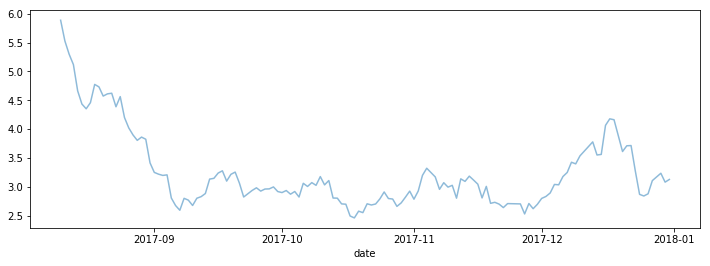

In [43]:
df_mean[time(6,0,0)].plot(alpha =0.5,figsize = (12,4))

In [10]:
len(df_reshaped)

147

### Markdown text